In [1]:
import pandas as pd\
,numpy as np\
,matplotlib.pyplot as plt\
,seaborn as sns\
,warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
display(train.head())
test.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8


In [4]:
train.shape

(1642, 10)

In [5]:
train.size

16420

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [7]:
train.isna().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [8]:
test.shape

(411, 10)

In [9]:
test.size

4110

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            411 non-null    int64  
 1   model         411 non-null    object 
 2   year          411 non-null    int64  
 3   motor_type    411 non-null    object 
 4   running       411 non-null    object 
 5   wheel         411 non-null    object 
 6   color         411 non-null    object 
 7   type          411 non-null    object 
 8   status        411 non-null    object 
 9   motor_volume  411 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 32.2+ KB


In [11]:
test.isna().sum()

Id              0
model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
dtype: int64

In [12]:
data = pd.concat((train,test),axis=0)
data.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,Id
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500.0,NaN
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500.0,NaN
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700.0,NaN
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000.0,NaN
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000.0,NaN


In [13]:
data.shape

(2053, 11)

In [14]:
data.size

22583

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 410
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2053 non-null   object 
 1   year          2053 non-null   int64  
 2   motor_type    2053 non-null   object 
 3   running       2053 non-null   object 
 4   wheel         2053 non-null   object 
 5   color         2053 non-null   object 
 6   type          2053 non-null   object 
 7   status        2053 non-null   object 
 8   motor_volume  2053 non-null   float64
 9   price         1642 non-null   float64
 10  Id            411 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 192.5+ KB


In [16]:
data.isna().sum()[0:-2] ## the target variable is excluded from consideration.

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
dtype: int64

In [17]:
data[["running", "unit"]] = data.running.str.split(expand=True)

In [18]:
data.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,Id,unit
0,toyota,2022,petrol,3000,left,skyblue,sedan,excellent,2.0,24500.0,NaN,km
1,mercedes-benz,2014,petrol,132000,left,black,sedan,excellent,2.0,25500.0,NaN,km
2,kia,2018,petrol,95000,left,other,sedan,excellent,2.0,11700.0,NaN,miles
3,mercedes-benz,2002,petrol,137000,left,golden,sedan,excellent,3.2,12000.0,NaN,miles
4,mercedes-benz,2017,petrol,130000,left,black,sedan,good,2.0,26000.0,NaN,km


In [19]:
data.running = data.running.astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 410
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2053 non-null   object 
 1   year          2053 non-null   int64  
 2   motor_type    2053 non-null   object 
 3   running       2053 non-null   float64
 4   wheel         2053 non-null   object 
 5   color         2053 non-null   object 
 6   type          2053 non-null   object 
 7   status        2053 non-null   object 
 8   motor_volume  2053 non-null   float64
 9   price         1642 non-null   float64
 10  Id            411 non-null    float64
 11  unit          2053 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 208.5+ KB


In [20]:
data.loc[data['unit'] == 'miles', 'running'] *= 1.60934

In [21]:
data.drop(["unit","Id"], axis = 1, inplace = True)

In [22]:
data.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000.00,left,skyblue,sedan,excellent,2.0,24500.0
1,mercedes-benz,2014,petrol,132000.00,left,black,sedan,excellent,2.0,25500.0
2,kia,2018,petrol,152887.30,left,other,sedan,excellent,2.0,11700.0
3,mercedes-benz,2002,petrol,220479.58,left,golden,sedan,excellent,3.2,12000.0
4,mercedes-benz,2017,petrol,130000.00,left,black,sedan,good,2.0,26000.0


In [23]:
data.describe()

,year,running,motor_volume,price
count,2053.000000,2.053000e+03,2053.000000,1642.000000
mean,2014.837311,1.184595e+05,2.033025,15982.633374
std,6.576572,9.468929e+04,0.248348,7176.084647
min,1987.000000,1.000000e+01,0.200000,462.000000
25%,2013.000000,5.600000e+04,2.000000,12000.000000
50%,2017.000000,9.857207e+04,2.000000,15750.000000
75%,2019.000000,1.600000e+05,2.000000,18500.000000
max,2023.000000,1.251708e+06,4.300000,87000.000000


In [24]:
data.describe(include = "object").T

,count,unique,top,freq
model,2053,5,mercedes-benz,495
motor_type,2053,5,petrol,1776
wheel,2053,2,left,2051
color,2053,17,black,672
type,2053,7,sedan,1596
status,2053,5,excellent,1504


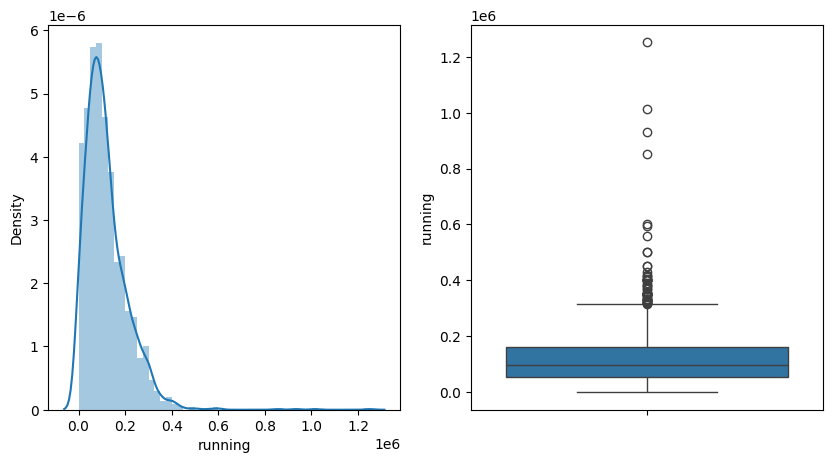

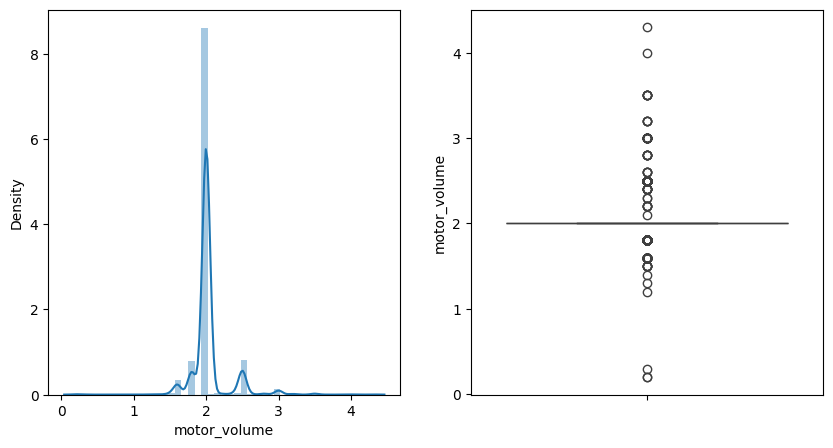

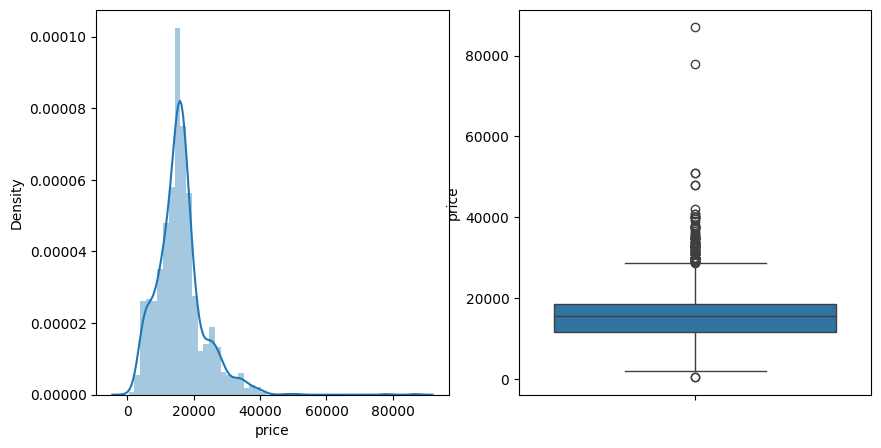

In [26]:
for col in data.columns:
    if data[col].dtype != "object" and col != "year":
        fig ,(fig1 , fig2) = plt.subplots(1,2,figsize=(10,5))
        sns.distplot(data[col], ax = fig1)
        sns.boxplot(y = data[col], ax = fig2)
        plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LabelEncoder().fit_transform(data[col])

In [28]:
data.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,4,2022,3,3000.00,0,15,5,1,2.0,24500.0
1,2,2014,3,132000.00,0,1,5,1,2.0,25500.0
2,1,2018,3,152887.30,0,10,5,1,2.0,11700.0
3,2,2002,3,220479.58,0,6,5,1,3.2,12000.0
4,2,2017,3,130000.00,0,1,5,2,2.0,26000.0


In [29]:
data.tail()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
406,3,2021,3,33400.0,0,1,6,1,2.0,NaN
407,0,2017,3,96560.4,0,10,5,1,2.0,NaN
408,2,2012,3,218000.0,0,16,5,2,2.0,NaN
409,1,2020,3,64373.6,0,13,5,2,2.0,NaN
410,0,2017,3,193120.8,0,16,5,1,2.0,NaN


In [30]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train = X.iloc[:1642,:],X.iloc[1642:,:], y[:1642]

In [32]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
#display(y_test.shape)## but all the values are null

(1642, 9)

(1642,)

(411, 9)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Cv = KFold(shuffle=True, random_state=1000, n_splits=4)
gb_regressor = GradientBoostingRegressor()
poly = PolynomialFeatures()
s = StandardScaler()

param_grid = {
    'poly__degree': [2, 3],
    'Gradient__n_estimators': [50, 100, 150],
    'Gradient__learning_rate': [0.01, 0.1, 0.2],
    'Gradient__max_depth': [3, 4, 5]
}

estimator = Pipeline([
    ("poly", poly),
    ("scaler", s),
    ("Gradient", gb_regressor)
])

grid = GridSearchCV(estimator, param_grid, cv=Cv, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_params_)
print("Best Accuracy: ", grid.best_score_)


Best Parameters:  {'Gradient__learning_rate': 0.1, 'Gradient__max_depth': 3, 'Gradient__n_estimators': 150, 'poly__degree': 2}
Best Accuracy:  0.7567797799266381


In [34]:
from scipy.stats.mstats import normaltest

result = normaltest(train.price.values)

alpha = 0.05

# Check the p-value against the significance level
if result.pvalue < alpha:
    print(f'The p-value ({result.pvalue:.4f}) is less than {alpha}. Reject the null hypothesis.')
    print('The data may not be normally distributed.')
else:
    print(f'The p-value ({result.pvalue:.4f}) is greater than or equal to {alpha}. Fail to reject the null hypothesis.')
    print('The data appears to be normally distributed.')


The p-value (0.0000) is less than 0.05. Reject the null hypothesis.
The data may not be normally distributed.


<Axes: >

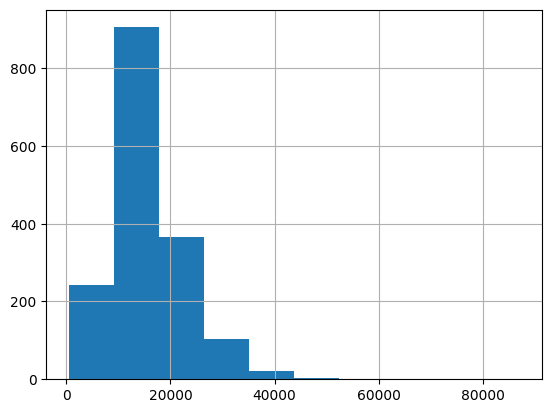

In [35]:
y_train.hist()

In [37]:
from scipy.stats.mstats import normaltest

result = normaltest(y_train)

alpha = 0.05

# Check the p-value against the significance level
if result.pvalue < alpha:
    print(f'The p-value ({result.pvalue:.6f}) is less than {alpha}. Reject the null hypothesis.')
    print('The data may not be normally distributed.')
else:
    print(f'The p-value ({result.pvalue:.6f}) is greater than or equal to {alpha}. Fail to reject the null hypothesis.')
    print('The data appears to be normally distributed.')


The p-value (0.000000) is less than 0.05. Reject the null hypothesis.
The data may not be normally distributed.


In [38]:
log_price = np.log(train.price)

<Axes: >

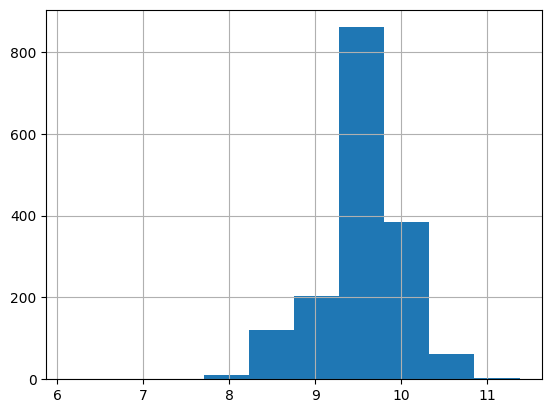

In [39]:
log_price.hist()

In [40]:
from scipy.stats.mstats import normaltest

result = normaltest(log_price)

alpha = 0.05

# Check the p-value against the significance level
if result.pvalue < alpha:
    print(f'The p-value ({result.pvalue:.6f}) is less than {alpha}. Reject the null hypothesis.')
    print('The data may not be normally distributed.')
else:
    print(f'The p-value ({result.pvalue:.6f}) is greater than or equal to {alpha}. Fail to reject the null hypothesis.')
    print('The data appears to be normally distributed.')


The p-value (0.000000) is less than 0.05. Reject the null hypothesis.
The data may not be normally distributed.


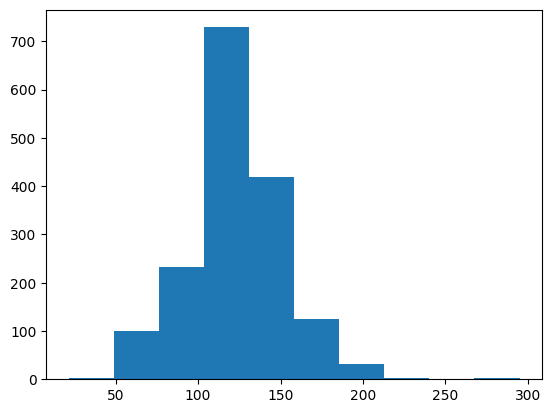

In [41]:
sqrt_price = np.sqrt(train.price)
plt.hist(sqrt_price);

In [42]:
from scipy.stats.mstats import normaltest

result = normaltest(sqrt_price)

alpha = 0.05

# Check the p-value against the significance level
if result.pvalue < alpha:
    print(f'The p-value ({result.pvalue:.6f}) is less than {alpha}. Reject the null hypothesis.')
    print('The data may not be normally distributed.')
else:
    print(f'The p-value ({result.pvalue:.6f}) is greater than or equal to {alpha}. Fail to reject the null hypothesis.')
    print('The data appears to be normally distributed.')


The p-value (0.000000) is less than 0.05. Reject the null hypothesis.
The data may not be normally distributed.


In [43]:
from scipy.stats import boxcox

In [44]:
bc_result = boxcox(train.price)
boxcox_price = bc_result[0]
lam = bc_result[1]

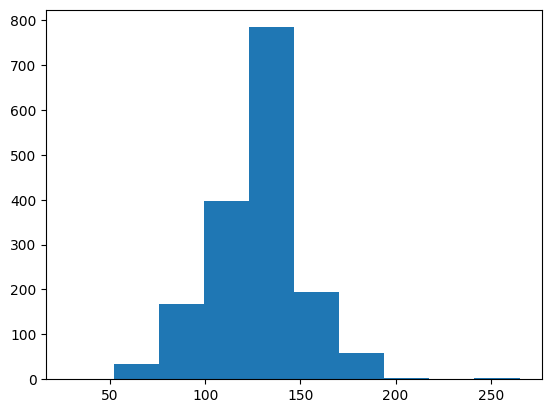

In [45]:
plt.hist(boxcox_price);

In [46]:
from scipy.stats.mstats import normaltest

result = normaltest(boxcox_price)

alpha = 0.05

# Check the p-value against the significance level
if result.pvalue < alpha:
    print(f'The p-value ({result.pvalue:.6f}) is less than {alpha}. Reject the null hypothesis.')
    print('The data may not be normally distributed.')
else:
    print(f'The p-value ({result.pvalue:.6f}) is greater than or equal to {alpha}. Fail to reject the null hypothesis.')
    print('The data appears to be normally distributed.')


The p-value (0.000000) is less than 0.05. Reject the null hypothesis.
The data may not be normally distributed.


In [47]:
from scipy.stats import zscore
standardized_data = zscore(train.price)

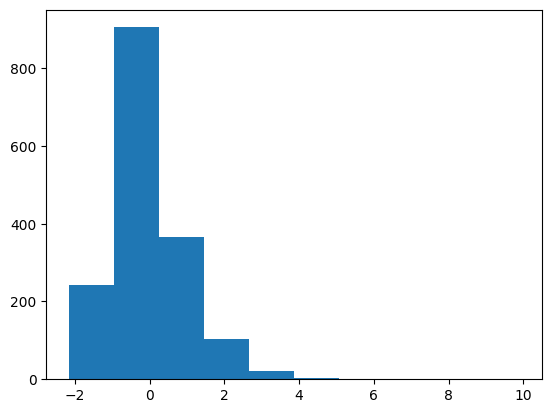

In [48]:
plt.hist(standardized_data);

In [49]:
from scipy.stats.mstats import normaltest

result = normaltest(standardized_data)

alpha = 0.05

# Check the p-value against the significance level
if result.pvalue < alpha:
    print(f'The p-value ({result.pvalue:.6f}) is less than {alpha}. Reject the null hypothesis.')
    print('The data may not be normally distributed.')
else:
    print(f'The p-value ({result.pvalue:.6f}) is greater than or equal to {alpha}. Fail to reject the null hypothesis.')
    print('The data appears to be normally distributed.')


The p-value (0.000000) is less than 0.05. Reject the null hypothesis.
The data may not be normally distributed.


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pipeline = make_pipeline(PolynomialFeatures(degree=2),
                         StandardScaler(),
                         GradientBoostingRegressor(learning_rate=0.1,
                                                   max_depth=3,
                                                   n_estimators=150))

pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=150))])

In [51]:
test_y_pred = pipeline.predict(X_test)
train_y_pred = pipeline.predict(X_train)

mse = mean_squared_error(y_train, train_y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Mean Squared Error on the test set: 4888537.344805076


In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, train_y_pred)

print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9050120744446335


In [53]:
Prediction = pd.DataFrame({"ID" : test["Id"], "Price":test_y_pred})
Prediction.set_index("ID")

,Price
ID,
0,17586.744874
1,17085.803619
2,23920.687650
3,14386.832984
4,6652.202175
...,...
406,26987.371680
407,13731.154738
408,14486.083191


### Converting dataframe into CSV file.

In [54]:
Prediction.to_csv("Submission file.csv")